In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import median_filter
import glob
from windrose import WindroseAxes
import cmcrameri as cmc
from cmcrameri import cm
from scipy.stats import linregress
import sys
import os
from pathlib import Path


# Add project 'src' directory to sys.path when running from the notebooks/ folder
# (notebooks/ is expected to be inside the repo; repo_root = parent of cwd)
repo_root = Path.cwd().parent
src_path = str(repo_root / 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import modules from the installed package. If this fails, the editable install
# (`pip install -e .`) may be missing or kernel needs restart.
try:
    from ec.func_read_data import *
    from ec.sensor_info import *
    from mo.func_mo import *
    from spc.normalize import *
    from plotting.funcs_plots import *
    from utils.utils import *
except Exception as e:
    print('Package import failed:', e)
    print('Make sure you ran `pip install -e .` (editable install) and restart the kernel, or that src/ exists at:', src_path)
else:
    # For development: auto-reload modules (keep this enabled while editing source files)
    %load_ext autoreload
    %autoreload 2

Using 2024 calibration coefficients
{'A': 4820.04, 'B': 3792900.0, 'C': -115477000.0, 'H2O_Zero': 0.7087, 'H20_Span': 0.9885}
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240118_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240120_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240122_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240120_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240122_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240201_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240201_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240205_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240205_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240214_SFC
Reading data from /home/

(<Figure size 1300x1400 with 7 Axes>,
 array([<Axes: ylabel='Temperature [oC]'>, <Axes: ylabel='RH wrt ice [%]'>,
        <Axes: ylabel='Wind Direction'>, <Axes: ylabel='Wind Speed[ms-1]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>,
        <Axes: ylabel='Flowcapt [g/m2/s]'>], dtype=object))

/home/engbers/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/engbers/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/engbers/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


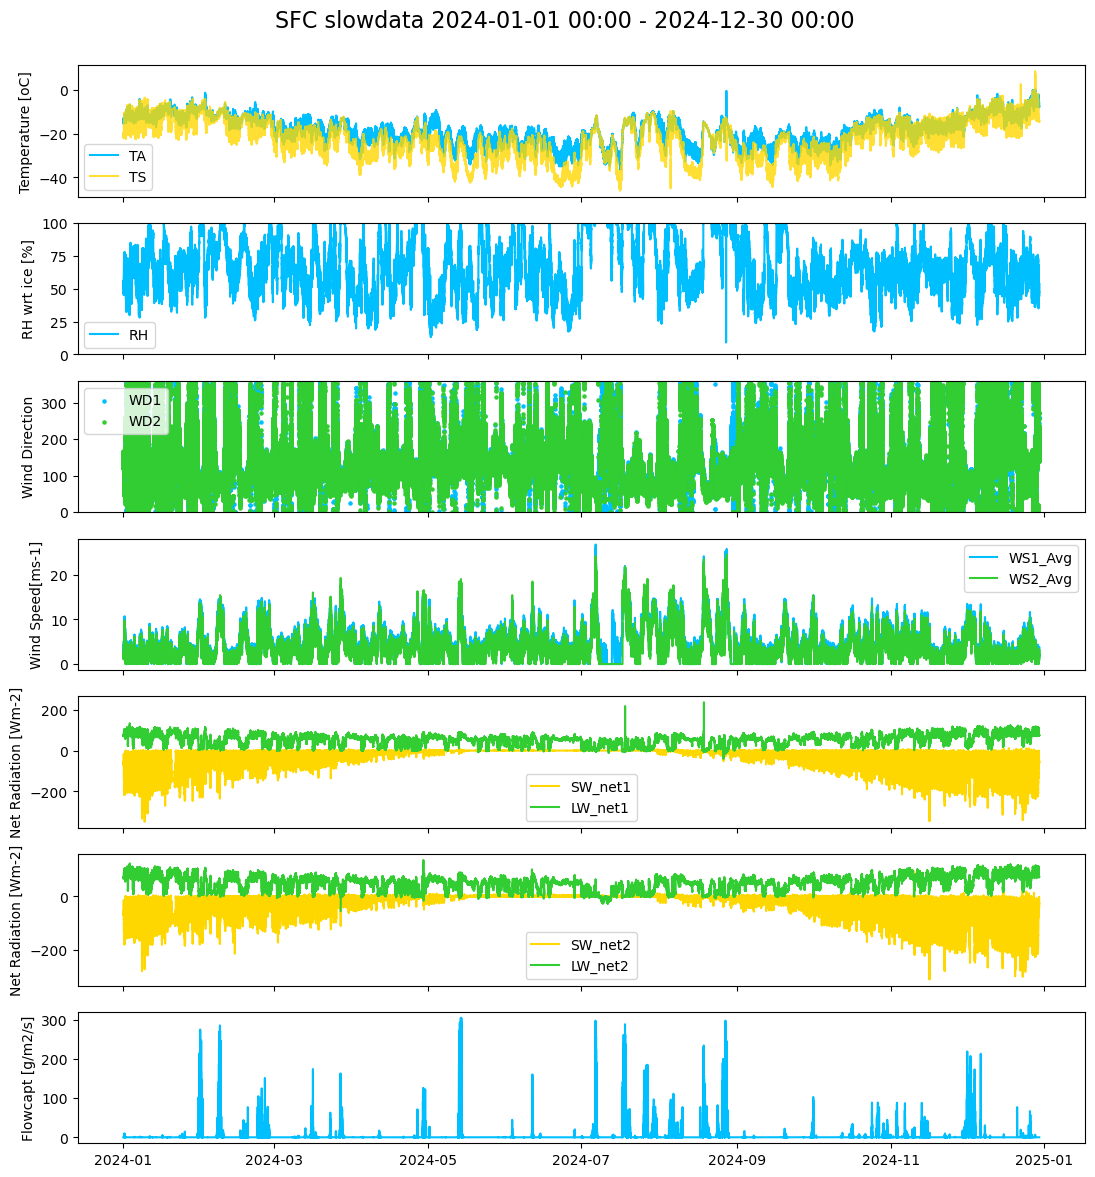

In [11]:
""""READ IN SLOWDATA SFC"""

folder='/home/engbers/Documents/PhD/EC_data_convert/converted/'
sensor='SFC'
start='2024-01-01 00:00'
end='2024-12-30 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights = get_sensor_info(sensor, 2024)

"""READ FAST AND SLOW DATA from folder"""
slowdata=read_data(folder, 'slow', sensor, start, end, plot_data=False)

"""CLEAN SLOWDATA"""
slowdata_cleaned=clean_slowdata(slowdata)
plot_SFC_slowdata(slowdata_cleaned, sensor, start, end)

In [12]:
"""READ IN EDDYPRO FILES"""
folder='/home/engbers/Documents/PhD/EC_data_convert/'

sensor='SFC_DR'
fluxes_SFC = read_eddypro_data(folder, sensor, qc_level=1)
fluxes_SFC_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_16m_DR'
fluxes_16m = read_eddypro_data(folder, sensor, qc_level=1)
fluxes_16m_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_26m'
fluxes_26m_qc = read_eddypro_data(folder, sensor, qc=True)
fluxes_26m = read_eddypro_data(folder, sensor, qc_level=1)

Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_full_output_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_full_output_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_full_output_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_full_output_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_full_output_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_full_output_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_full_output_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/20241

/home/engbers/Documents/Github/DataProcessingScripts/src/ec/func_read_data.py:458: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProcessingScripts/src/ec/func_read_data.py:458: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProce

Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_qc_details_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_qc_details_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_qc_details_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_qc_details_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_qc_details_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_qc_details_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_qc_details_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202411/eddyp

In [13]:
z0, z0rolling=compute_roughness_length(fluxes_SFC, fluxes_SFC_qc,heights['sonic'])


In [15]:
# Get data without units first
start='2024-02-01'
end='2024-12-01'

p_data = resample_with_threshold(fluxes_SFC['air_pressure'], '10min', 80)[start:end]
T_data = resample_with_threshold(slowdata_cleaned['TA'], '10min', 80)[start:end]
z0_data = resample_with_threshold(z0rolling, '10min', 80)[start:end]
vw_data = resample_with_threshold(slowdata_cleaned['WS2_Avg'], '10min', 80)[start:end]
ts_data = resample_with_threshold(slowdata_cleaned['SFTempK'], '10min', 80)[start:end]-273.15
rh_data = resample_with_threshold(slowdata_cleaned['RH'], '10min', 80)[start:end]

# Print lengths of all resampled data
print("Data lengths after resampling:")
print(f"p_data:  {len(p_data)}")
print(f"T_data:  {len(T_data)}")
print(f"z0_data: {len(z0_data)}")
print(f"vw_data: {len(vw_data)}")
print(f"ts_data: {len(ts_data)}")
print(f"rh_data: {len(rh_data)}")

# Create input dataframe
dat = pd.DataFrame({
    'time': p_data.index,
    'pressure': p_data.values,
    'TA': T_data.values,
    'z0': z0_data.values,
    'ws': vw_data.values,
    'T_surf': ts_data.values,
    'RH': rh_data.values,
    'z_ws': heights['WIND2'],
    'z_TA_RH': heights['TH']
})

dat['qv'] = RH_to_specific_humidity(dat['RH'], dat['TA'], dat['pressure'])
dat['qv_surf']=calc_qv_surface(dat['T_surf'], dat['pressure'])['qv_surf']
dat['rho_air_surf'] = calc_qv_surface(dat['T_surf'], dat['pressure'])['rho_air_surf']

# Latent heat of sublimation (J kg-1) at surface temperature
# Formula as in LES-LSM
dat['Ls'] = Lsubl(temp=dat['T_surf'].values)

print(f"Reference specific humidity range: {dat['qv'].min():.6f} to {dat['qv'].max():.6f} kg/kg")
print(f"Surface specific humidity range: {dat['qv_surf'].min():.6f} to {dat['qv_surf'].max():.6f} kg/kg")
print(f"Latent heat of sublimation range: {dat['Ls'].min():.0f} to {dat['Ls'].max():.0f} J/kg")

# Initialize result dataframe
result = pd.DataFrame({
    'time': dat['time'],
    'u_star': np.nan,
    'Tw_flux': np.nan,
    'qw_flux': np.nan,
    'zeta': np.nan,
    'psi_m': np.nan,
    'psi_s': np.nan,
    'converged': np.nan
})

# Time loop - iterative flux calculation
for i in range(len(dat)):
    d = dat.iloc[i]
    
    # Skip iteration if any value is NA
    if d.isna().any():
        # print(f"Warning: Input data contains missing value at index {i}; continuing with next time step.")
        continue
    
    # Iterative flux calculation
    flux_result = calc_fluxes_iter(
        z_ref_vw=d['z_ws'], 
        z_ref_scalar=d['z_TA_RH'], 
        rough_len_m=d['z0'],
        vw_ref=d['ws'], 
        T_ref=d['TA'], 
        qv_ref=d['qv'], 
        T_surf=d['T_surf'], 
        qv_surf=d['qv_surf']
    )
    
    # Store results (assuming calc_fluxes_iter returns a dict or tuple)
    result.loc[i, 'u_star':'converged'] = flux_result

# Convert units: vapor flux (kg kg-1 m s-1) to latent heat flux (W m-2)
result['LE'] = dat['Ls'] * dat['rho_air_surf'] * result['qw_flux']
c_p = 1004
result['H'] = c_p*dat['rho_air_surf'] * result['Tw_flux']
result.set_index('time', inplace=True)
print("\nFlux calculation complete!")
print(result.head())

Data lengths after resampling:
p_data:  43920
T_data:  43920
z0_data: 43920
vw_data: 43920
ts_data: 43920
rh_data: 43920
Reference specific humidity range: 0.000061 to 0.002507 kg/kg
Surface specific humidity range: 0.000047 to 0.003074 kg/kg
Latent heat of sublimation range: 2835299 to 2839356 J/kg


/home/engbers/Documents/Github/DataProcessingScripts/src/mo/func_mo.py:264: RuntimeWarning: divide by zero encountered in scalar divide
  zeta_new = -z_ref_scalar * kappa * (g / T_surf) * Tw_flux / u_star**3
/home/engbers/Documents/Github/DataProcessingScripts/src/mo/func_mo.py:264: RuntimeWarning: divide by zero encountered in scalar divide
  zeta_new = -z_ref_scalar * kappa * (g / T_surf) * Tw_flux / u_star**3
/home/engbers/Documents/Github/DataProcessingScripts/src/mo/func_mo.py:264: RuntimeWarning: divide by zero encountered in scalar divide
  zeta_new = -z_ref_scalar * kappa * (g / T_surf) * Tw_flux / u_star**3
/home/engbers/Documents/Github/DataProcessingScripts/src/mo/func_mo.py:264: RuntimeWarning: divide by zero encountered in scalar divide
  zeta_new = -z_ref_scalar * kappa * (g / T_surf) * Tw_flux / u_star**3
/home/engbers/Documents/Github/DataProcessingScripts/src/mo/func_mo.py:264: RuntimeWarning: divide by zero encountered in scalar divide
  zeta_new = -z_ref_scalar * kap


Flux calculation complete!
                       u_star   Tw_flux       qw_flux      zeta     psi_m  \
time                                                                        
2024-02-01 00:00:00  0.380470 -0.034062 -1.644415e-06 -0.447838  0.721486   
2024-02-01 00:10:00  0.400685 -0.033144 -1.289170e-06 -0.387363  0.664833   
2024-02-01 00:20:00  0.479944 -0.034499 -9.542329e-07 -0.246147  0.505756   
2024-02-01 00:30:00  0.373378 -0.028531 -9.157018e-07 -0.420970  0.696987   
2024-02-01 00:40:00  0.392571 -0.025676 -1.869329e-07 -0.332107  0.607767   

                        psi_s  converged        LE          H  
time                                                           
2024-02-01 00:00:00  1.133268        1.0 -5.296834 -38.831224  
2024-02-01 00:10:00  1.054724        1.0 -4.145949 -37.725626  
2024-02-01 00:20:00  0.828598        1.0 -3.062823 -39.192755  
2024-02-01 00:30:00  1.099416        1.0 -2.942306 -32.447122  
2024-02-01 00:40:00  0.974622        1.0 -0.6001

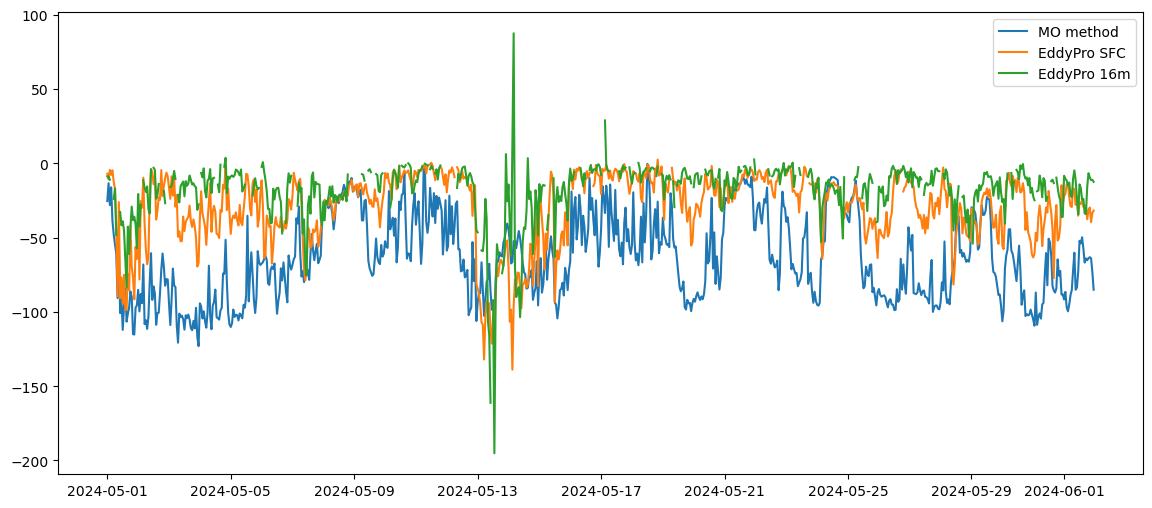

In [25]:
plt.figure(figsize=(14,6))
start='2024-05-01'
end='2024-06-01'    
plt.plot(resample_with_threshold(result['H'], '1h', interpolate=True, max_gap='1h', min_valid_percent=80)[start:end], label='MO method')
plt.plot(resample_with_threshold(fluxes_SFC['H'], '1h', interpolate=True, max_gap='30min', min_valid_percent=80)[start:end], label='EddyPro SFC')
plt.plot(resample_with_threshold(fluxes_16m['H'], '1h', interpolate=True, max_gap='30min', min_valid_percent=80)[start:end], label='EddyPro 16m')
plt.legend()

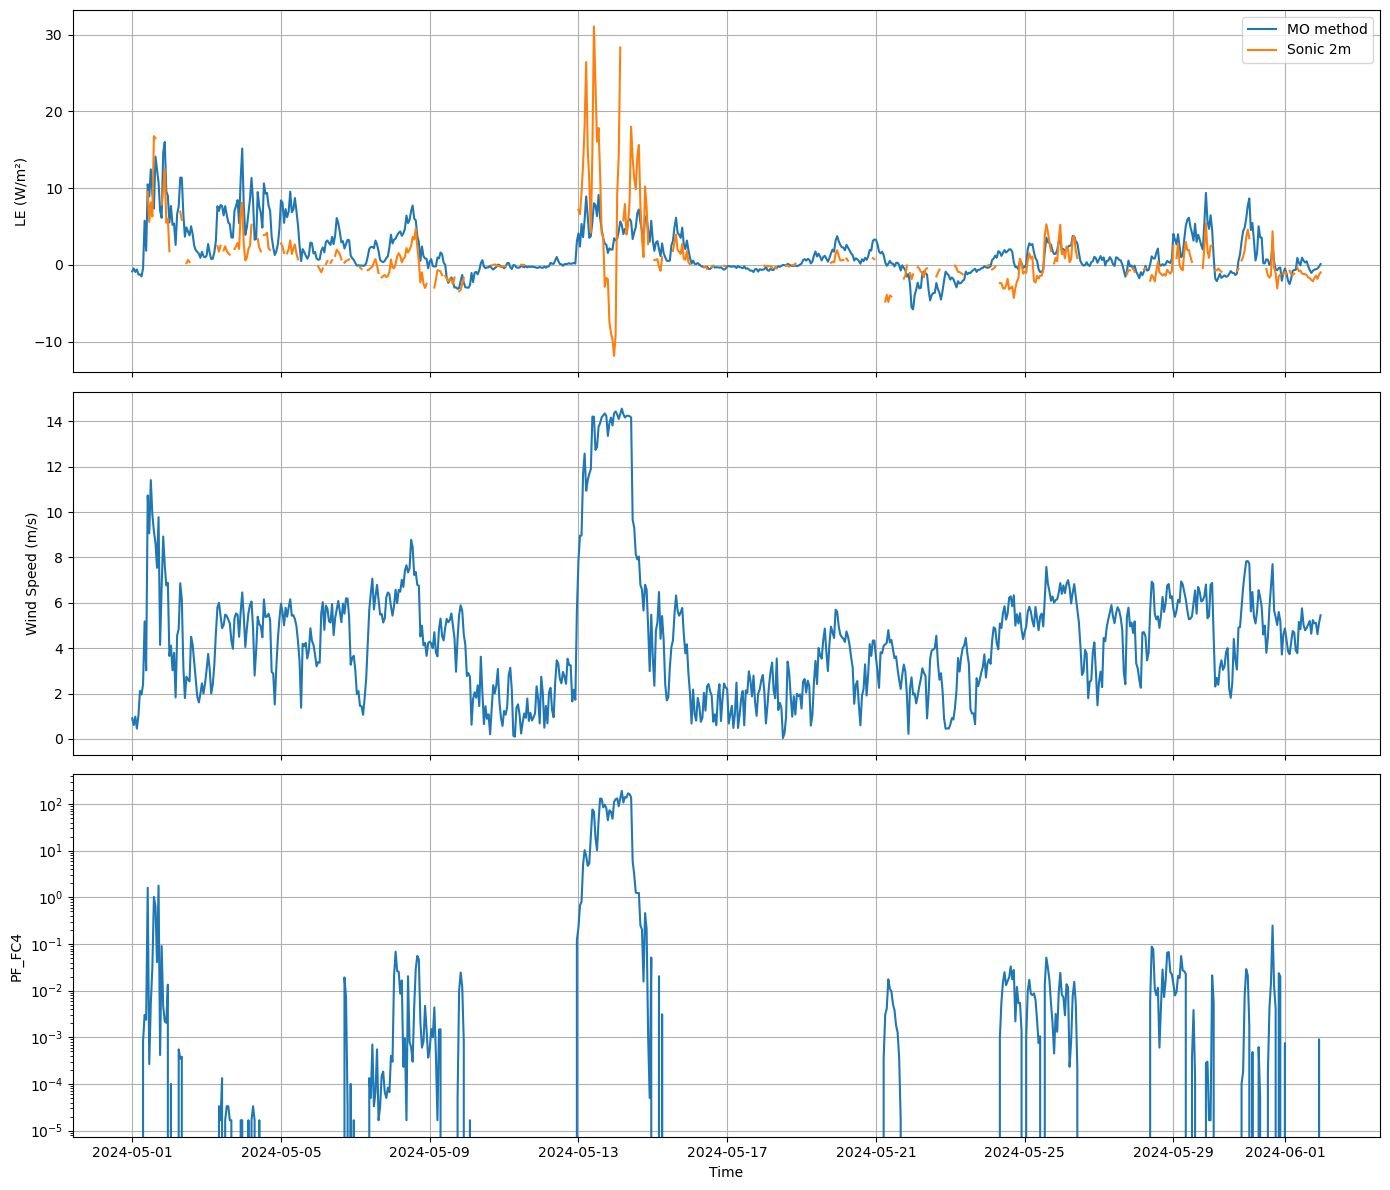

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot 1: LE comparison
axes[0].plot(resample_with_threshold(result['LE'], '1h', interpolate=True, max_gap='1h', min_valid_percent=80)[start:end], label='MO method')
axes[0].plot(resample_with_threshold(fluxes_SFC['LE'], '1h', interpolate=True, max_gap='5min', min_valid_percent=80)[start:end], label='Sonic 2m')
axes[0].set_ylabel('LE (W/m²)')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Wind speed
axes[1].plot(resample_with_threshold(slowdata_cleaned['WS1_Avg'], '1h', interpolate=True, max_gap='1h', min_valid_percent=80)[start:end])
axes[1].set_ylabel('Wind Speed (m/s)')
axes[1].grid(True)

# Plot 3: PF_FC4
axes[2].plot(resample_with_threshold(slowdata_cleaned['PF_FC4'], '1h', interpolate=True, max_gap='1h', min_valid_percent=80)[start:end])
axes[2].set_ylabel('PF_FC4')
axes[2].set_xlabel('Time')
axes[2].grid(True)
axes[2].set_yscale('log')

plt.tight_layout()


In [ ]:
result.to

In [35]:
result.to_csv('/home/engbers/Documents/Github/DataProcessingScripts//MO_fluxes_2024.csv')

(-30.0, 50.0)

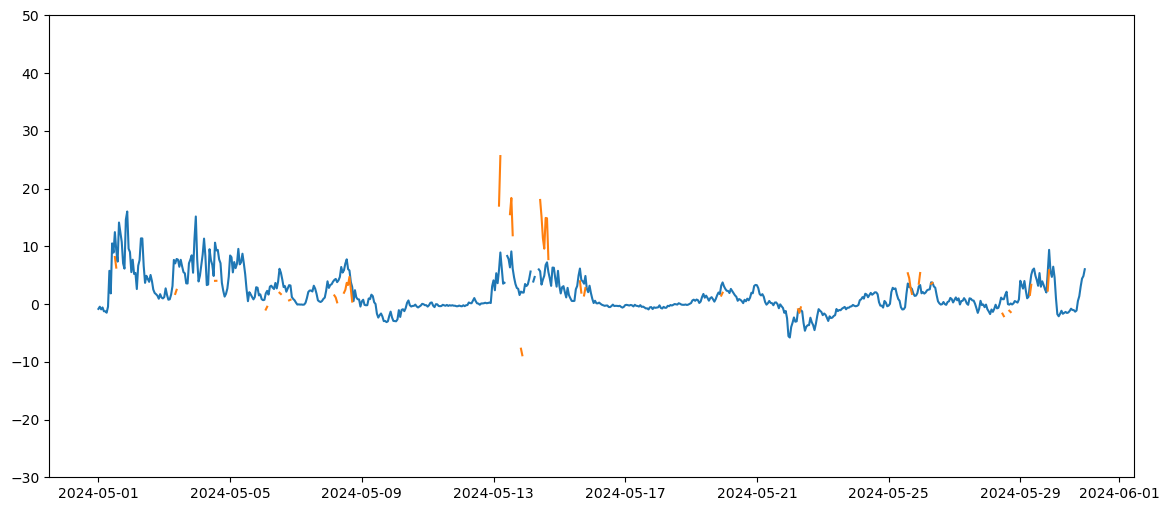

In [95]:


plt.figure(figsize=(14,6))
plt.plot(resample_with_threshold(result['LE'], '1h', 80)[start:end])
plt.plot(resample_with_threshold(fluxes_SFC['LE'], '1h', 70)[start:end])
plt.ylim(-30,50)

In [11]:
z0rolling

datetime
2024-01-01 00:00:00    0.000235
2024-01-01 00:03:00    0.000235
2024-01-01 00:06:00    0.000235
2024-01-01 00:09:00    0.000235
2024-01-01 00:12:00    0.000235
                         ...   
2024-12-31 14:45:00    0.000285
2024-12-31 14:48:00    0.000285
2024-12-31 14:51:00    0.000285
2024-12-31 14:54:00    0.000285
2024-12-31 14:57:00    0.000285
Length: 175500, dtype: float64

In [7]:
heights

{'WIND2': 1.45,
 'WIND1': 3.45,
 'sonic': 1.9,
 'SD': 1.7,
 'TH': 2,
 'RAD1': 192.5,
 'RAD2': 42.5,
 'FC': 0,
 'SPC': 0.2}

In [5]:
# Force reload the mo module
import importlib
import mo
importlib.reload(mo.func_mo)
importlib.reload(mo)

# Now check what's available
print("Functions in mo module after reload:")
print([name for name in dir(mo) if not name.startswith('_')])

print("\n" + "="*50 + "\n")

# Check if calc_fluxes_iter is available
print("calc_fluxes_iter available?", 'calc_fluxes_iter' in dir(mo))

Functions in mo module after reload:
['calc_MO_profile', 'calc_bulk_kinemat_flux', 'calc_coeff_scalar', 'calc_fluxes_iter', 'calc_psi_stable_holtslag', 'calc_psi_stable_stearns_weidner', 'calc_psi_unstable', 'calc_psi_unstable_paulson_stearns_weidner', 'compute_MO', 'compute_roughness_length', 'func_mo', 'np', 'pd', 'plt']


calc_fluxes_iter available? True


In [12]:
z0rolling.resample('10min').mean()

datetime
2024-01-01 00:00:00    0.000235
2024-01-01 00:10:00    0.000235
2024-01-01 00:20:00    0.000235
2024-01-01 00:30:00    0.000235
2024-01-01 00:40:00    0.000235
                         ...   
2024-12-31 14:10:00    0.000285
2024-12-31 14:20:00    0.000285
2024-12-31 14:30:00    0.000285
2024-12-31 14:40:00    0.000285
2024-12-31 14:50:00    0.000285
Freq: 10min, Length: 52650, dtype: float64